# Object detection 2

## Packages and aplications

In [ ]:
# uncomment the next line if you want to delete an existing models directory
!rm -rf ./models/

# clone the Tensorflow Model Garden
!git clone --depth 1 https://github.com/tensorflow/models/

# install the Object Detection API
!cd models/research/ && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .

import matplotlib
import matplotlib.pyplot as plt

import os
import random
import zipfile
import io
import scipy.misc
import numpy as np

import glob
import imageio
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.get_logger().setLevel('ERROR')


Cloning into 'models'...
remote: Enumerating objects: 2444, done.
remote: Counting objects: 100% (2444/2444), done.
remote: Compressing objects: 100% (2049/2049), done.
remote: Total 2444 (delta 582), reused 1382 (delta 367), pack-reused 0
Receiving objects: 100% (2444/2444), 30.85 MiB | 18.18 MiB/s, done.
Resolving deltas: 100% (582/582), done.
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1624271 sha256=2f7b02acd36093f1eb4f02291045ce0f7265deb2e8b7170766fa8b33c2fea721
  Stored in directory: /tmp/pip-ephem-wheel-cache-dpaobe2l/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection
  Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [ ]:
### START CODE HERE (Replace Instances of `None` with your code) ###
# import the label map utility module
from object_detection.utils import label_map_util

# import module for reading and updating configuration files.
from object_detection.utils import config_util

# import module for visualization. use the alias `viz_utils`
from object_detection.utils import visualization_utils as viz_utils

# import module for building the detection model
from object_detection.builders import model_builder
### END CODE HERE ###

# import module for utilities in Colab
from object_detection.utils import colab_utils

In [ ]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
    path: a file path.

    Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
    """
    
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)


def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
    """Wrapper function to visualize detections.

    Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
          and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
          this function assumes that the boxes to be plotted are groundtruth
          boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
          category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
    """
    
    image_np_with_annotations = image_np.copy()
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_annotations,
        boxes,
        classes,
        scores,
        category_index,
        use_normalized_coordinates=True,
        min_score_thresh=0.8)
    
    if image_name:
        plt.imsave(image_name, image_np_with_annotations)
    
    else:
        plt.imshow(image_np_with_annotations)


## Images

./Imagenes/imagen_1.jpg
./Imagenes/imagen_2.jpg
./Imagenes/imagen_3.jpg
./Imagenes/imagen_4.jpg
./Imagenes/imagen_5.jpg
./Imagenes/imagen_6.jpg
./Imagenes/imagen_7.jpg


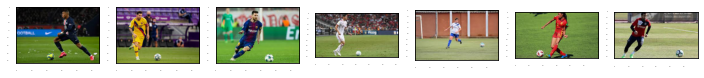

In [ ]:
%matplotlib inline

### START CODE HERE (Replace Instances of `None` with your code) ###

# assign the name (string) of the directory containing the training images
train_image_dir = './Imagenes'

# declare an empty list
train_images_np = []

# run a for loop for each image
for i in range(1, 8): # @REPLACE for i in range(None, None)

    # define the path (string) for each image
    image_path = os.path.join(train_image_dir, f'imagen_{str(i)}.jpg')
    print(image_path)

    # load images into numpy arrays and append to a list
    train_images_np.append(load_image_into_numpy_array(image_path))
### END CODE HERE ###

# configure plot settings via rcParams
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [14, 7]

# plot images
for idx, train_image_np in enumerate(train_images_np):
    plt.subplot(1, 8, idx+1)
    plt.imshow(train_image_np)

plt.show()

## Train data

In [ ]:
# Define the list of ground truth boxes
gt_boxes = []

In [ ]:
# Option 1: draw your own ground truth boxes

# annotate the training images
colab_utils.annotate(train_images_np, box_storage_pointer=gt_boxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'--boxes array populated--'

<IPython.core.display.Javascript object>

In [ ]:
ref_gt_boxes=gt_boxes
for gt_box in ref_gt_boxes:
  print(gt_box)

[[0.81938889 0.36363636 0.94938889 0.46545455]
 [0.06938889 0.44727273 0.95272222 0.93454545]]
[[0.82938889 0.44363636 0.95772222 0.54181818]
 [0.07272222 0.13818182 0.94772222 0.40363636]]
[[0.84105555 0.57454545 0.97772222 0.69090909]
 [0.06438889 0.17090909 0.96438889 0.55272727]]
[[0.86105555 0.47402597 0.97438889 0.55519481]
 [0.05772222 0.21103896 0.97105555 0.44155844]]
[[0.65272222 0.76632302 0.73938889 0.83161512]
 [0.15772222 0.33333333 0.77438889 0.56357388]]
[[0.83772222 0.25       0.97272222 0.34666667]
 [0.00272222 0.30333333 0.99772222 0.63666667]]
[[0.82105555 0.73578595 0.97938889 0.83277592]
 [0.00272222 0.10033445 0.99438889 0.44147157]]


## Index dictionary

In [ ]:
### START CODE HERE (Replace instances of `None` with your code ###

# Assign the zombie class ID
balon_class_id = 1
jugador_class_id = 2
# define a dictionary describing the zombie class
category_index = {
    balon_class_id: {
        'id': balon_class_id,
        'name': 'balon'
    },
    jugador_class_id: {
        'id': jugador_class_id,
        'name': 'jugador'
    }
}

# Specify the number of classes that the model will predict
num_classes = 2
### END CODE HERE ###

In [ ]:
print(category_index[jugador_class_id])

{'id': 2, 'name': 'jugador'}


In [ ]:
# The `label_id_offset` here shifts all classes by a certain number of indices;
# we do this here so that the model receives one-hot labels where non-background
# classes start counting at the zeroth index.  This is ordinarily just handled
# automatically in our training binaries, but we need to reproduce it here.
dosobjetos2=np.array([1,2])
label_id_offset = 1
train_image_tensors = []

# lists containing the one-hot encoded classes and ground truth boxes
gt_classes_one_hot_tensors = []
gt_box_tensors = []

for (train_image_np, gt_box_np) in zip(train_images_np, gt_boxes):
    
    # convert training image to tensor, add batch dimension, and add to list
    train_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(
        train_image_np, dtype=tf.float32), axis=0))
    
    # convert numpy array to tensor, then add to list
    gt_box_tensors.append(tf.convert_to_tensor(gt_box_np, dtype=tf.float32))
    
    # apply offset to to have zero-indexed ground truth classes
    zero_indexed_groundtruth_classes = tf.convert_to_tensor(
        dosobjetos2 - label_id_offset)
    
    # do one-hot encoding to ground truth classes
    gt_classes_one_hot_tensors.append(tf.one_hot(
        zero_indexed_groundtruth_classes, num_classes))

print('Done prepping data.')

Done prepping data.


## Show images with boxes

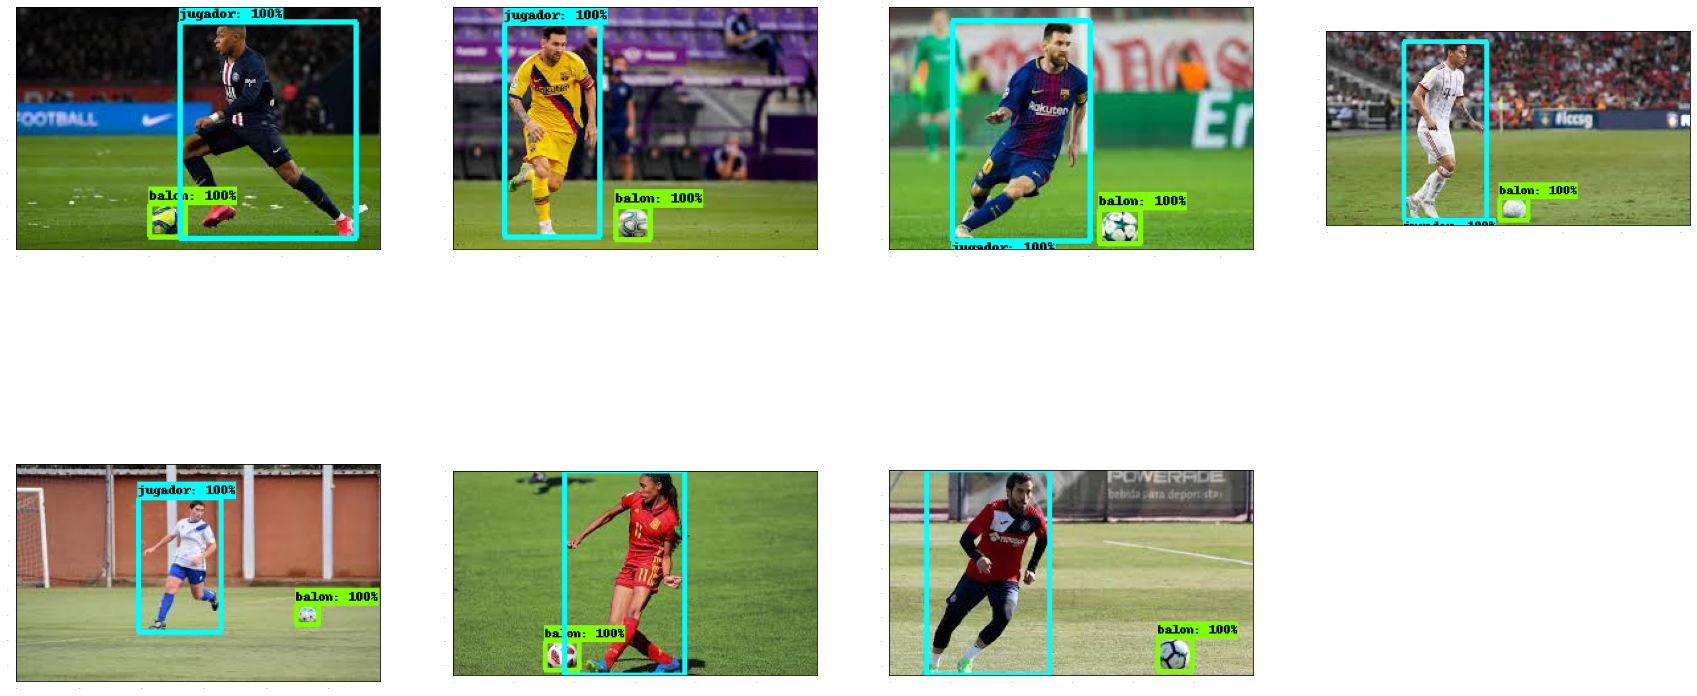

In [ ]:
# give boxes a score of 100%
dummy_scores = np.array([1.0,1.0], dtype=np.float32)

# define the figure size
plt.figure(figsize=(30, 15))

# use the `plot_detections()` utility function to draw the ground truth boxes
for idx in range(7):
    plt.subplot(2, 4, idx+1)
    plot_detections(
      train_images_np[idx],
      gt_boxes[idx],
      [1,2],
      dummy_scores, category_index)

plt.show()

## Download checkpoint

In [ ]:

### START CODE HERE ###
# Download the SSD Resnet 50 version 1, 640x640 checkpoint
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
    
# untar (decompress) the tar file
!tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

# copy the checkpoint to the test_data folder models/research/object_detection/test_data/
!mv ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint models/research/object_detection/test_data/

### END CODE HERE

--2021-03-02 14:43:18--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.20.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz.1’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M   147MB/s    in 1.6s    

2021-03-02 14:43:20 (147 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz.1’ saved [244817203/244817203]



## Configuration of the model

In [ ]:
### START CODE HERE ###
# define the path to the .config file for ssd resnet 50 v1 640x640
pipeline_config = '/content/models/research/object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config'

# Load the configuration file into a dictionary
configs = config_util.get_configs_from_pipeline_file(pipeline_config)

### END CODE HERE ###
# See what configs looks like
#configs

In [ ]:
### START CODE HERE ###
# Read in the object stored at the key 'model' of the configs dictionary
model_config = configs.get('model')

### END CODE HERE
# see what model_config looks like
#model_config

In [ ]:
### START CODE HERE ###
# Modify the number of classes from its default of 90
model_config.ssd.num_classes = num_classes

# Freeze batch normalization
model_config.ssd.freeze_batchnorm = True

### END CODE HERE

# See what model_config now looks like after you've customized it!
#model_config

In [ ]:
### START CODE HERE (Replace instances of `None` with your code) ###
detection_model = model_builder.build(model_config=model_config, is_training=True)
### END CODE HERE ###

print(type(detection_model))

<class 'object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch'>


### Checkpoint

In [ ]:
### START CODE HERE ###

tmp_box_predictor_checkpoint = tf.train.Checkpoint(
    _base_tower_layers_for_heads = detection_model._box_predictor._base_tower_layers_for_heads,
    _box_prediction_head = detection_model._box_predictor._box_prediction_head
)  

### END CODE HERE

In [ ]:
### START CODE HERE ###
tmp_model_checkpoint = tf.train.Checkpoint(
    _box_predictor = tmp_box_predictor_checkpoint,
    _feature_extractor = detection_model._feature_extractor
)
### END CODE HERE ###

In [ ]:
### START CODE HERE ###

checkpoint_path = 'models/research/object_detection/test_data/checkpoint/ckpt-0'

# Define a checkpoint that sets `model= None
checkpoint = tf.train.Checkpoint(
    model=tmp_model_checkpoint
)

# Restore the checkpoint to the checkpoint path
checkpoint.restore(checkpoint_path)

### END CODE HERE ###

### Generation of variables

In [ ]:
### START CODE HERE (Replace instances of `None` with your code)###

# use the detection model's `preprocess()` method and pass a dummy image
tmp_image, tmp_shapes = detection_model.preprocess(tf.zeros([1, 640, 640, 3]))

# run a prediction with the preprocessed image and shapes
tmp_prediction_dict = detection_model.predict(tmp_image, tmp_shapes)

# postprocess the predictions into final detections
tmp_detections = detection_model.postprocess(tmp_prediction_dict, tmp_shapes)

### END CODE HERE ###

print('Weights restored!')

Weights restored!


### Definition of parameters

In [ ]:
tf.keras.backend.set_learning_phase(True)

### START CODE HERE (Replace instances of `None` with your code)###

# set the batch_size
batch_size = 5

# set the number of batches
num_batches = 100

# Set the learning rate
learning_rate = 0.01

# set the optimizer and pass in the learning_rate
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

### END CODE HERE ###

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


### Select prediction layers

In [ ]:
### START CODE HERE (Replace instances of `None` with your code) ###

# define a list that contains the layers that you wish to fine tune
to_fine_tune = []
for v in detection_model.trainable_variables:
  if v.name.startswith('WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutional'):
    to_fine_tune.append(v)

### END CODE HERE

# i: 0 	 name: WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead/BoxPredictor/kernel:0 	 shape:(3, 3, 256, 24) 	 dtype=<dtype: 'float32'>
# i: 1 	 name: WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead/BoxPredictor/bias:0 	 shape:(24,) 	 dtype=<dtype: 'float32'>
# i: 2 	 name: WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead/ClassPredictor/kernel:0 	 shape:(3, 3, 256, 546) 	 dtype=<dtype: 'float32'>
# i: 3 	 name: WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead/ClassPredictor/bias:0 	 shape:(546,) 	 dtype=<dtype: 'float32'>

## Train the model

In [ ]:
# Get a batch of your training images
g_images_list = train_image_tensors[0:2]

In [ ]:
preprocessed_image_list = []
true_shape_list = []

for img in g_images_list:
    processed_img, true_shape = detection_model.preprocess(img)
    preprocessed_image_list.append(processed_img)
    true_shape_list.append(true_shape)

In [ ]:
# decorate with @tf.function for faster training (remember, graph mode!)
@tf.function
def train_step_fn(image_list,
                groundtruth_boxes_list,
                groundtruth_classes_list,
                model,
                optimizer,
                vars_to_fine_tune):
    """A single training iteration.

    Args:
      image_list: A list of [1, height, width, 3] Tensor of type tf.float32.
        Note that the height and width can vary across images, as they are
        reshaped within this function to be 640x640.
      groundtruth_boxes_list: A list of Tensors of shape [N_i, 4] with type
        tf.float32 representing groundtruth boxes for each image in the batch.
      groundtruth_classes_list: A list of Tensors of shape [N_i, num_classes]
        with type tf.float32 representing groundtruth boxes for each image in
        the batch.

    Returns:
      A scalar tensor representing the total loss for the input batch.
    """

    # Provide the ground truth to the model
    model.provide_groundtruth(
        groundtruth_boxes_list=groundtruth_boxes_list,
        groundtruth_classes_list=groundtruth_classes_list
    )

    with tf.GradientTape() as tape:
    ### START CODE HERE (Replace instances of `None` with your code) ###

        # Preprocess the images
        preprocessed_image_list = []
        true_shape_list = []

        for img in image_list:
            processed_img, true_shape = model.preprocess(img)
            preprocessed_image_list.append(processed_img)
            true_shape_list.append(true_shape)

        preprocessed_image_tensor = tf.concat(preprocessed_image_list, axis=0)
        true_shape_tensor = tf.concat(true_shape_list, axis=0)

        # Make a prediction
        prediction_dict = model.predict(preprocessed_image_tensor, true_shape_tensor)

        # Calculate the total loss (sum of both losses)
        losses_dict = model.loss(prediction_dict, true_shape_tensor)
        
        total_loss = losses_dict['Loss/localization_loss'] + losses_dict['Loss/classification_loss']

        # Calculate the gradients
        gradients = tape.gradient([total_loss], vars_to_fine_tune)

        # Optimize the model's selected variables
        optimizer.apply_gradients(zip(gradients, vars_to_fine_tune))

        ### END CODE HERE ###
        
    return total_loss

In [ ]:
print('Start fine-tuning!', flush=True)

for idx in range(num_batches):
    # Grab keys for a random subset of examples
    all_keys = list(range(len(train_images_np)))
    random.shuffle(all_keys)
    example_keys = all_keys[:batch_size]

    # Get the ground truth
    gt_boxes_list = [gt_box_tensors[key] for key in example_keys]
    gt_classes_list = [gt_classes_one_hot_tensors[key] for key in example_keys]
    
    # get the images
    image_tensors = [train_image_tensors[key] for key in example_keys]

    # Training step (forward pass + backwards pass)
    total_loss = train_step_fn(image_tensors, 
                               gt_boxes_list, 
                               gt_classes_list,
                               detection_model,
                               optimizer,
                               to_fine_tune
                              )

    if idx % 10 == 0:
        print('batch ' + str(idx) + ' of ' + str(num_batches)
        + ', loss=' +  str(total_loss.numpy()), flush=True)

print('Done fine-tuning!')

Start fine-tuning!
batch 0 of 100, loss=1.0711001
batch 10 of 100, loss=0.32131237
batch 20 of 100, loss=0.07803557
batch 30 of 100, loss=0.04696365
batch 40 of 100, loss=0.034015093
batch 50 of 100, loss=0.02168086
batch 60 of 100, loss=0.014962021
batch 70 of 100, loss=0.010944638
batch 80 of 100, loss=0.009024244
batch 90 of 100, loss=0.009813485
Done fine-tuning!


## Predition

In [ ]:
test_image_dir = './results/'
test_images_np = []

# load images into a numpy array. this will take a few minutes to complete.
for i in range(1, 9):
    image_path = os.path.join(test_image_dir, 'prueba_' + "{0:01}".format(i) + '.jpg')
    print(image_path)
    test_images_np.append(np.expand_dims(
      load_image_into_numpy_array(image_path), axis=0))

./results/prueba_1.jpg
./results/prueba_2.jpg
./results/prueba_3.jpg
./results/prueba_4.jpg
./results/prueba_5.jpg
./results/prueba_6.jpg
./results/prueba_7.jpg
./results/prueba_8.jpg


In [ ]:
# Again, uncomment this decorator if you want to run inference eagerly
@tf.function
def detect(input_tensor):
    """Run detection on an input image.

    Args:
    input_tensor: A [1, height, width, 3] Tensor of type tf.float32.
      Note that height and width can be anything since the image will be
      immediately resized according to the needs of the model within this
      function.

    Returns:
    A dict containing 3 Tensors (`detection_boxes`, `detection_classes`,
      and `detection_scores`).
    """
    preprocessed_image, shapes = detection_model.preprocess(input_tensor)
    prediction_dict = detection_model.predict(preprocessed_image, shapes)
    
    ### START CODE HERE (Replace instances of `None` with your code) ###
    # use the detection model's postprocess() method to get the the final detections
    detections = detection_model.postprocess(prediction_dict, shapes)
    ### END CODE HERE ###
    
    return detections

In [ ]:
# Note that the first frame will trigger tracing of the tf.function, which will
# take some time, after which inference should be fast.

label_id_offset = 1
results = {'boxes': [], 'scores': []}

for i in range(len(test_images_np)):
    input_tensor = tf.convert_to_tensor(test_images_np[i], dtype=tf.float32)
    detections = detect(input_tensor)
    plot_detections(
      test_images_np[i][0],
      detections['detection_boxes'][0].numpy(),
      detections['detection_classes'][0].numpy().astype(np.uint32)
      + label_id_offset,
      detections['detection_scores'][0].numpy(),
      category_index, figsize=(15, 20), image_name="./results/gif_frame_" + ('%03d' % i) + ".jpg")
    results['boxes'].append(detections['detection_boxes'][0][0].numpy())
    results['scores'].append(detections['detection_scores'][0][0].numpy())

Frame 0


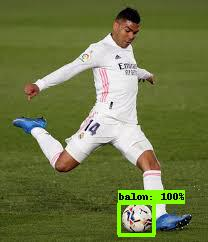


Frame 1


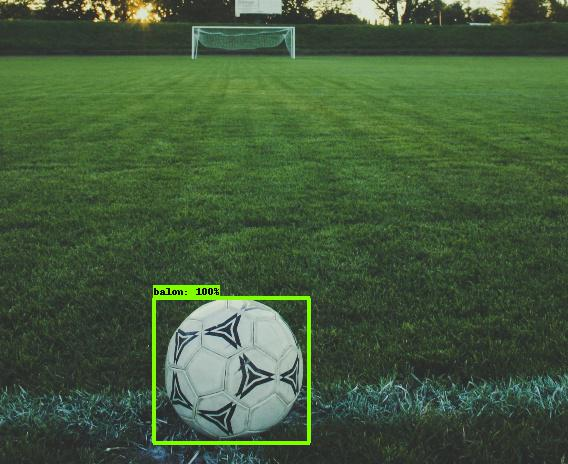


Frame 2


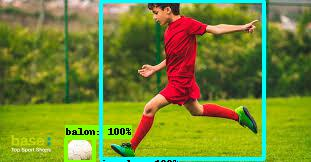


Frame 3


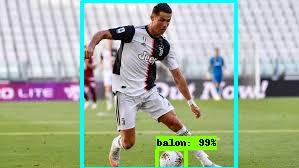


Frame 4


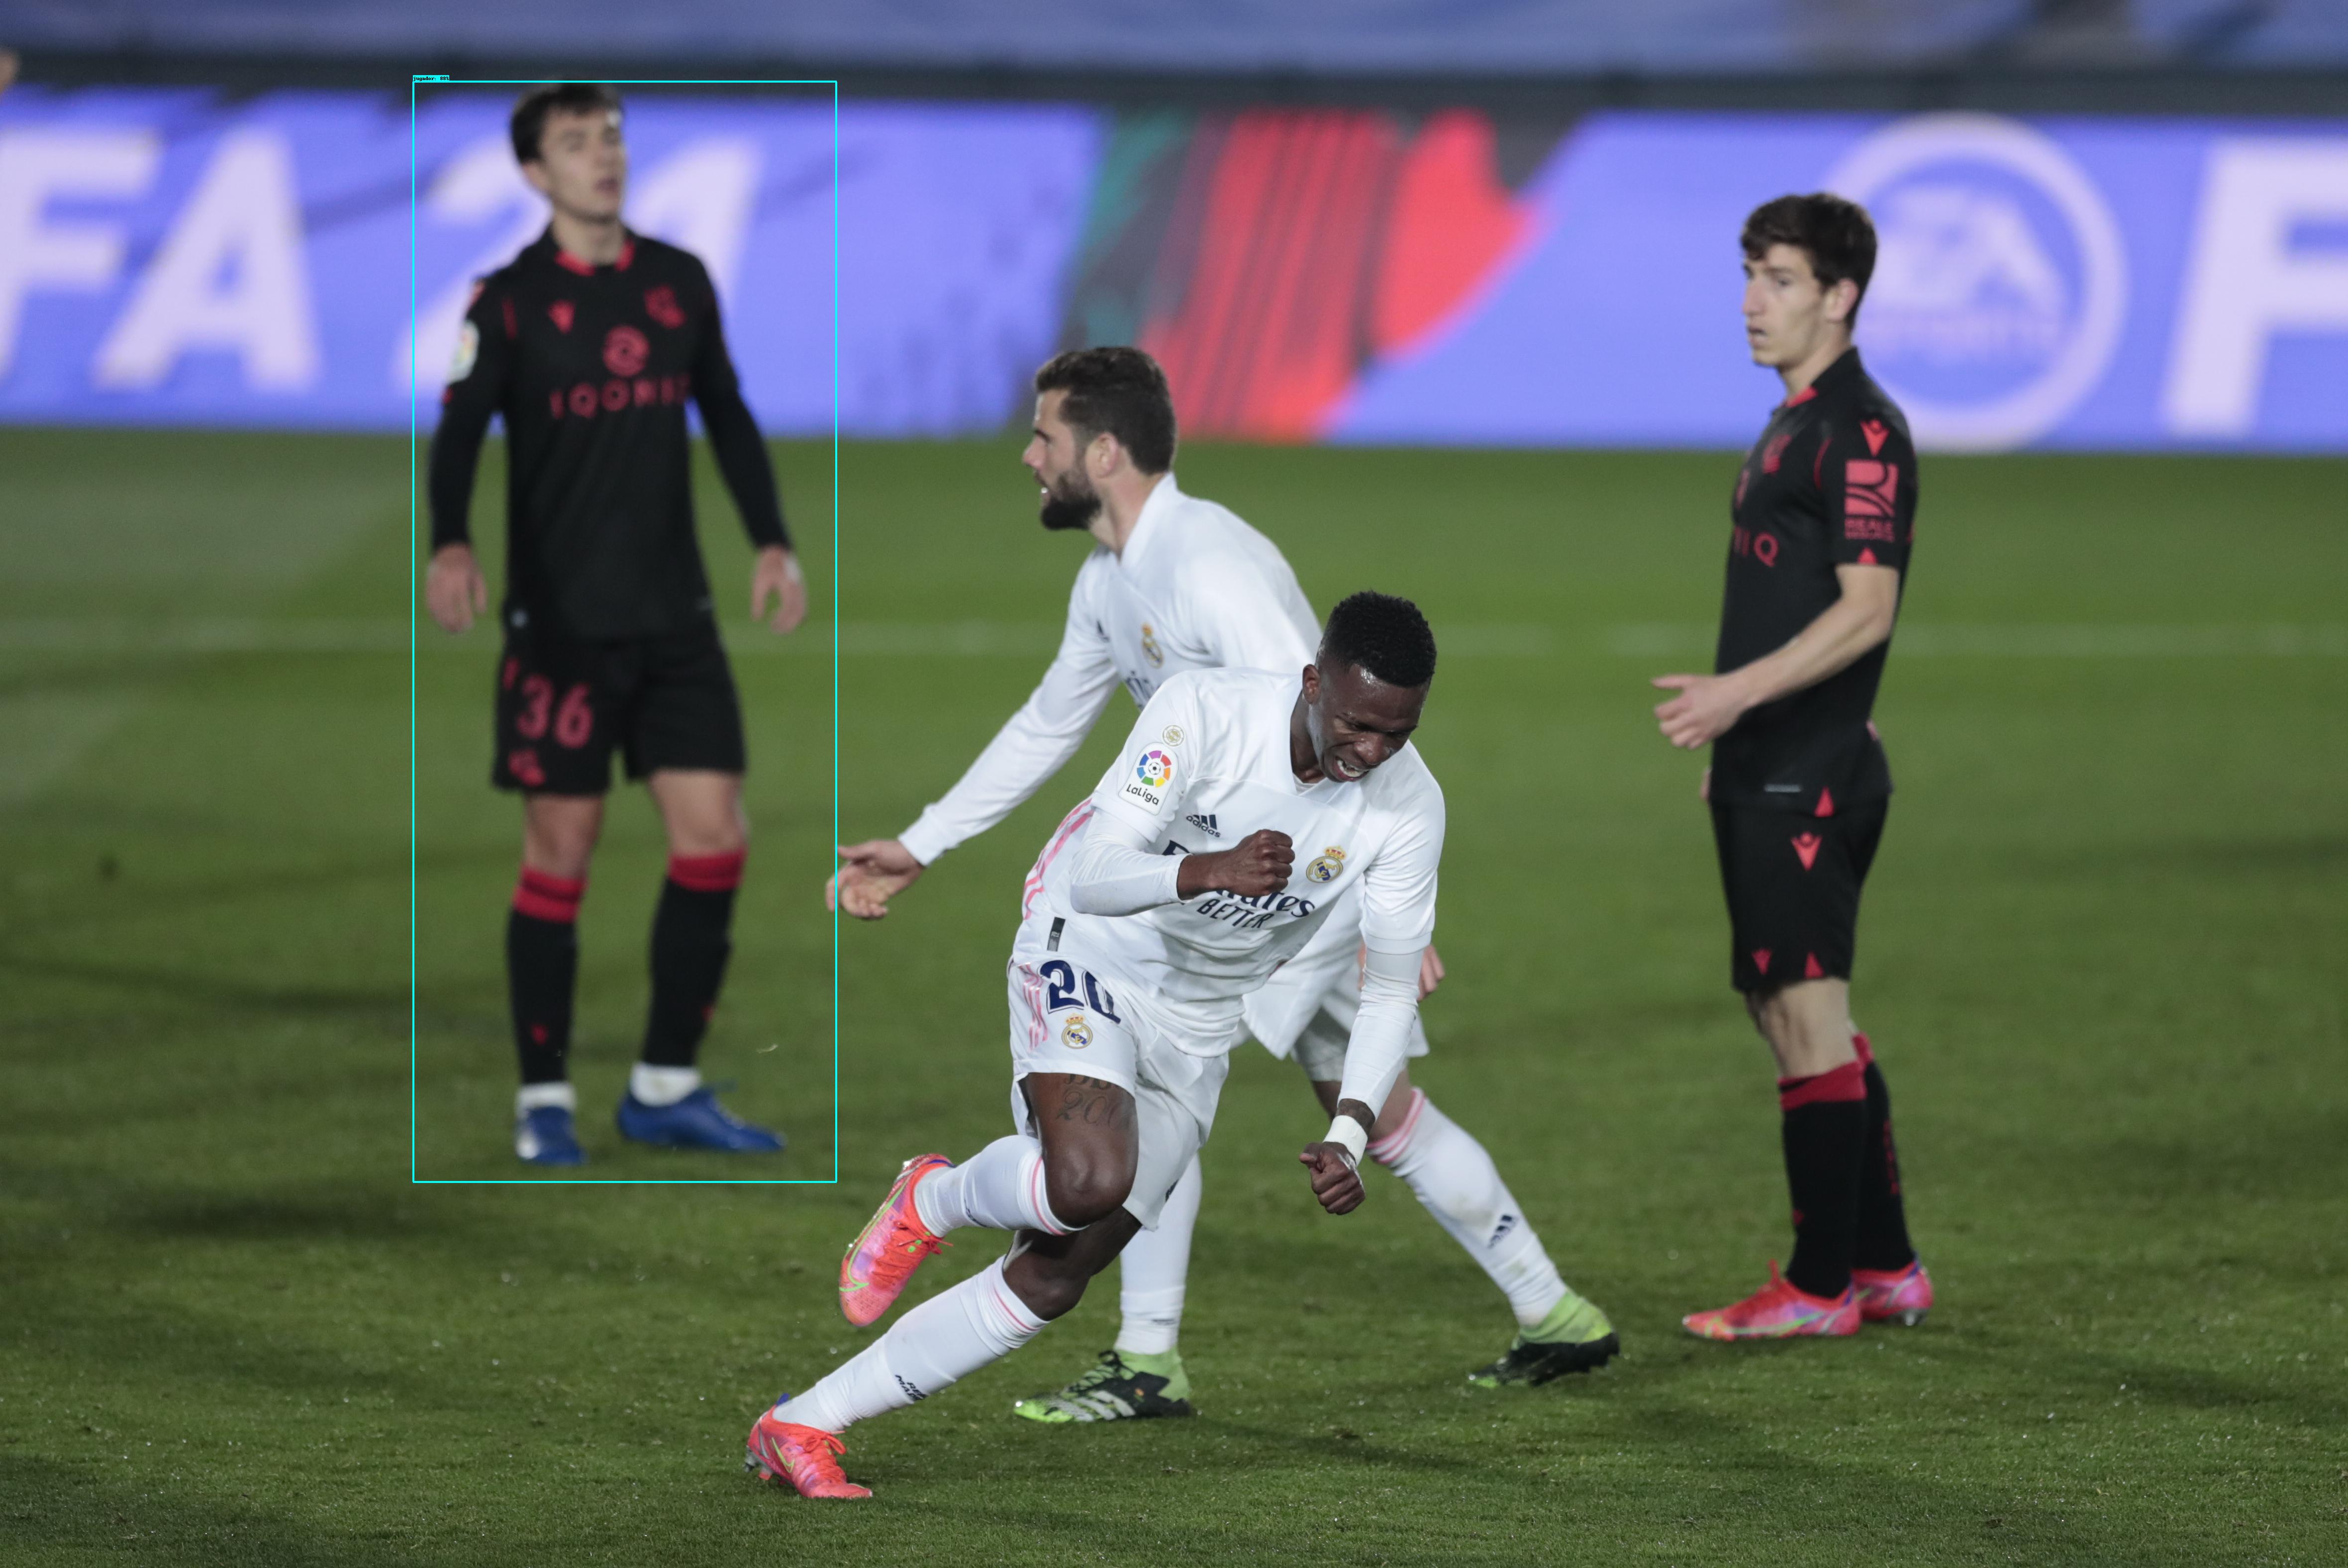


Frame 5


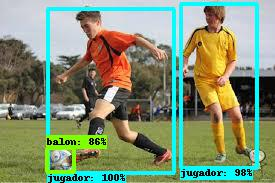


Frame 6


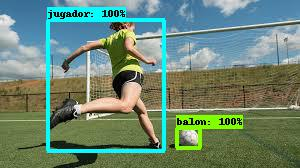


Frame 7


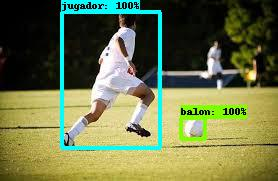

In [ ]:
print('Frame 0')
display(IPyImage('./results/gif_frame_000.jpg'))
print()
print('Frame 1')
display(IPyImage('./results/gif_frame_001.jpg'))
print()
print('Frame 2')
display(IPyImage('./results/gif_frame_002.jpg'))
print()
print('Frame 3')
display(IPyImage('./results/gif_frame_003.jpg'))
print()
print('Frame 4')
display(IPyImage('./results/gif_frame_004.jpg'))
print()
print('Frame 5')
display(IPyImage('./results/gif_frame_005.jpg'))
print()
print('Frame 6')
display(IPyImage('./results/gif_frame_006.jpg'))
print()
print('Frame 7')
display(IPyImage('./results/gif_frame_007.jpg'))
